<a href="https://colab.research.google.com/github/juwoncozyboy/Machine_learning_advance/blob/main/day05_rent%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
#데이터 로드
data = pd.read_csv("rent.csv")

In [ ]:
#데이터 확인
data.head() #상위 5개 행 출력

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [ ]:
data.describe() #기술통계(평균, 표준편차, 최소값, 최대값 등)

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [ ]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
#범주형 변수 분석
# print(data['Floor'].value_counts(), "\n")
# print(data['Area Type'].value_counts(), "\n")
# print(data['Area Locality'].value_counts(), "\n")
print(data["City"].value_counts(), "\n")
# print(data["Furnishing Status"].value_counts(), "\n")
# print(data["Point of Contact"].value_counts())

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64 



In [ ]:
#수치형 변수 상관관계 분석
data.corr()

<ipython-input-8-87370241d1b1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent,0.369718,1.000000,0.413551,0.441215
Size,0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


In [ ]:
new_column_name = {
    "Posted On" : "Posted_On",
    "BHK" : "BHK",
    "Rent" : "Rent",
    "Size" : "Size",
    "Floor" : "Floor",
    "Area Type" : "Area_Type",
    "Area Locality" : "Area_Locality",
    "City" : "City",
    "Furnishing Status" : "Furnishing_Status",
    "Tenant Preferred" : "Tenant_Preferred",
    "Bathroom" : "Bathroom",
    "Point of Contact" : "Point_of_Contact"
}

data.rename(columns = new_column_name, inplace = True)

#변경된 컬럼 이름 확인
data.head()

,Posted_On,BHK,Rent,Size,Floor,Area_Type,Area_Locality,City,Furnishing_Status,Tenant_Preferred,Bathroom,Point_of_Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
data['BHK']

0       2
1       2
2       2
3       2
4       2
       ..
4741    2
4742    3
4743    3
4744    3
4745    2
Name: BHK, Length: 4746, dtype: int64

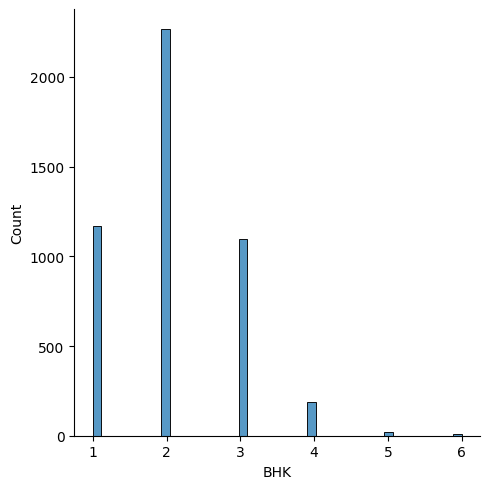

In [ ]:
#BHK열의 데이터 시각화
sns.displot(data['BHK'])

In [ ]:
data['Rent'].sort_values() #아웃라이어일 가능성이 높음 3500000
#아웃라이어 : 데이터 집합에서 다른 관측치들과 동떨어진 극단적인 값을 가지는 데이터 포인트를 의미

4076       1200
285        1500
471        1800
2475       2000
146        2200
         ...   
1459     700000
1329     850000
827     1000000
1001    1200000
1837    3500000
Name: Rent, Length: 4746, dtype: int64

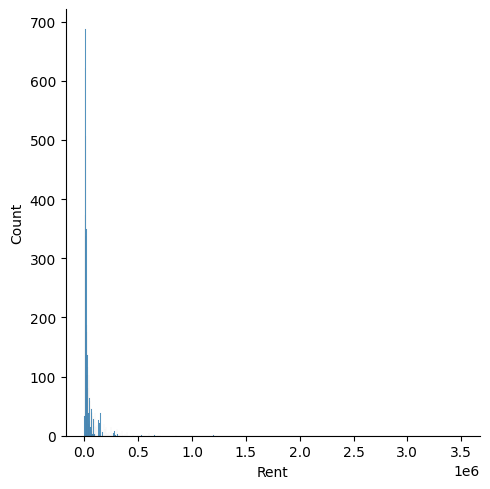

In [ ]:
sns.displot(data['Rent'])

In [ ]:
data['Size']

0       1100
1        800
2       1000
3        800
4        850
        ... 
4741    1000
4742    2000
4743    1750
4744    1500
4745    1000
Name: Size, Length: 4746, dtype: int64

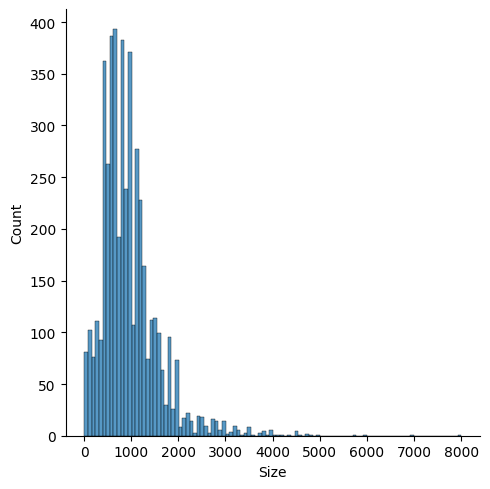

In [ ]:
sns.displot(data['Size'])

In [ ]:
#BHK과 임대료의 상관관계 파악
corr_BR = data['BHK'].corr(data['Rent'])
print(f"BHK와 임대료의 상관관계 : {corr_BR:.2f}")

BHK와 임대료의 상관관계 : 0.37


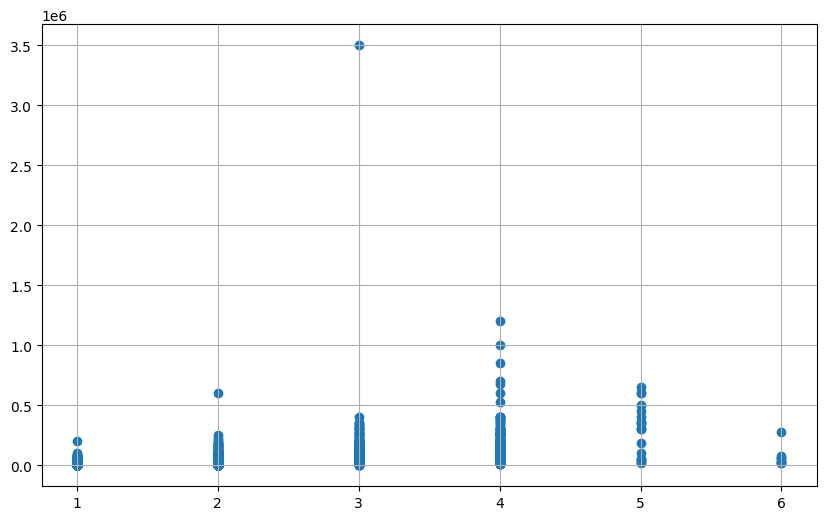

In [ ]:
#산점도 시각화
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.scatter(data['BHK'], data['Rent'])
plt.grid(True)
plt.show()


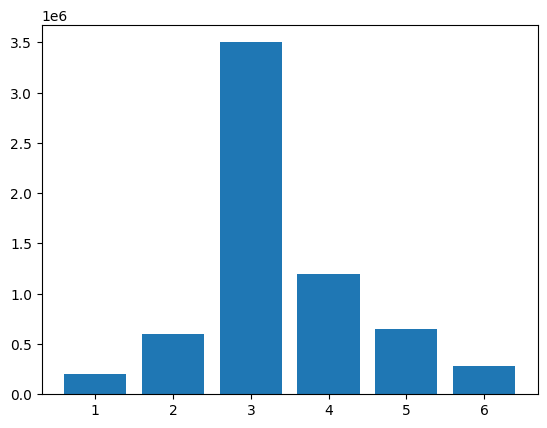

In [ ]:
#막대그래프 시각화
plt.bar(data['BHK'], data['Rent'])
plt.show()

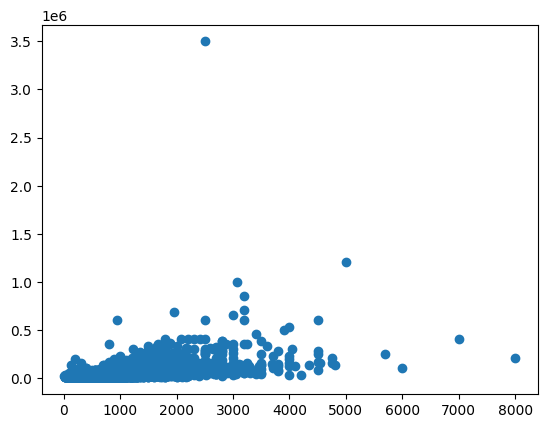

In [ ]:
#평수와 임대료의 관계 확인
plt.scatter(data['Size'], data['Rent'])

#y축 눈금 범위 설정
# plt.yticks(range(1000, 1300000, 1000)) #원하는 y축 범위로 설정
# plt.ylim(1000, 1500000) #원하는 y축 범위로 설정

plt.show()

In [ ]:
data['Rent'].sort_values()

4076       1200
285        1500
471        1800
2475       2000
146        2200
         ...   
1459     700000
1329     850000
827     1000000
1001    1200000
1837    3500000
Name: Rent, Length: 4746, dtype: int64

In [ ]:
#상관관계 계산
rent_size = data['Rent'].corr(data['Size'])
rent_bhk = data['Rent'].corr(data['BHK'])
rent_city = data.groupby('City')['Rent'].corr(data['Rent'])

print(f"임대료와 사이즈의 상관 관계 : {rent_size:.2f}")
print(f"임대료와 BHK의 상관 관계 : {rent_bhk:.2f}")
print(f"도시별 임대료와 임대료의 상관 관계 : {rent_city}")

임대료와 사이즈의 상관 관계 : 0.41
임대료와 BHK의 상관 관계 : 0.37
도시별 임대료와 임대료의 상관 관계 : City
Bangalore    1.0
Chennai      1.0
Delhi        1.0
Hyderabad    1.0
Kolkata      1.0
Mumbai       1.0
Name: Rent, dtype: float64


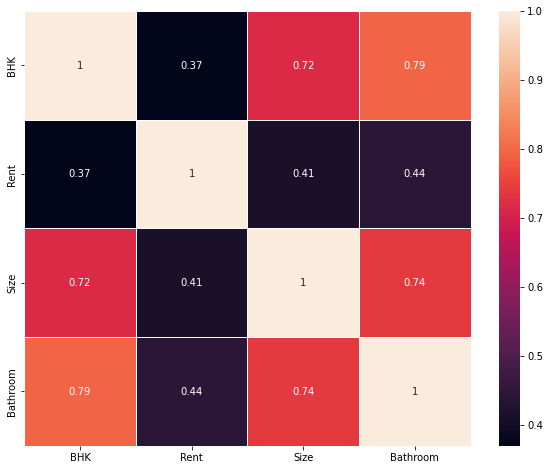

In [ ]:
#히트맵 시각화
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr(), annot=True, linewidths=0.5)
plt.show()

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent,0.369718,1.000000,0.413551,0.441215
Size,0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


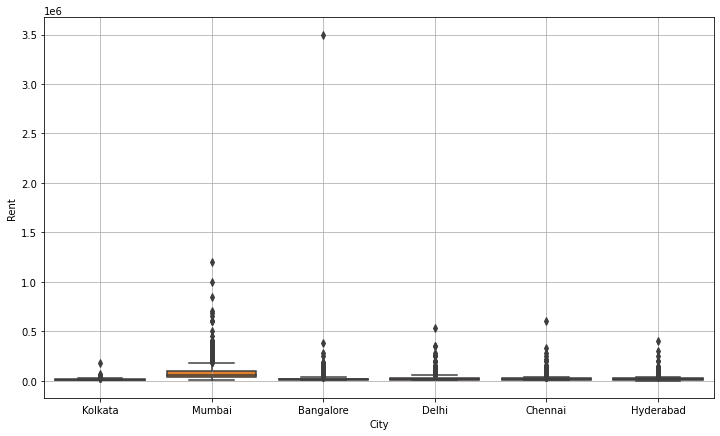

In [ ]:
#지역별 임대료 분포 시각화(boxplot)

plt.figure(figsize = (12, 7))
sns.boxplot(x = "City", y = "Rent", data=data)
plt.grid(True)
plt.show()